In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os
from statsmodels.graphics.regressionplots import influence_plot
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [2]:
Toyota = pd.read_csv("ToyotaCorolla.csv",encoding='ISO-8859-1')
Toyota.head(80)

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,76,TOYOTA Corolla 1.6 16V VVT I 5DR TERRA COMFORT...,16950,23,10,2002,28000,Petrol,110,1,...,1,1,1,0,0,1,1,0,0,0
76,77,TOYOTA Corolla 1.6 16V VVT I 5DR SOL 4/5-Doors,18750,31,2,2002,25266,Petrol,110,1,...,1,1,1,0,1,1,1,0,0,0
77,78,TOYOTA Corolla 1.6 16V VVT I 5DR TERRA 4/5-Doors,18450,27,6,2002,23489,Petrol,110,0,...,1,1,1,0,0,1,1,0,0,0
78,79,TOYOTA Corolla 1.6 16V VVT I 5DR TERRA 4/5-Doors,16895,29,4,2002,22575,Petrol,110,1,...,1,1,1,0,0,0,0,0,0,0


In [3]:
Toyota1= Toyota.iloc[:,[2,3,6,8,12,13,15,16,17]]
Toyota1

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


In [4]:
Toyota1.rename(columns={'Age_08_04':'Age'} , inplace=True)

C:\Users\vaish\anaconda3\lib\site-packages\pandas\core\frame.py:4133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [5]:
Toyota1

,Price,Age,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


In [6]:
Toyota1.describe()

,Price,Age,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.000000,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,101.502089,1576.85585,4.033426,5.026462,87.122563,1072.45961
std,3626.964585,18.599988,37506.448872,14.981080,424.38677,0.952677,0.188510,41.128611,52.64112
min,4350.000000,1.000000,1.000000,69.000000,1300.00000,2.000000,3.000000,19.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,90.000000,1400.00000,3.000000,5.000000,69.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,110.000000,1600.00000,4.000000,5.000000,85.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,110.000000,1600.00000,5.000000,5.000000,85.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,16000.00000,5.000000,6.000000,283.000000,1615.00000


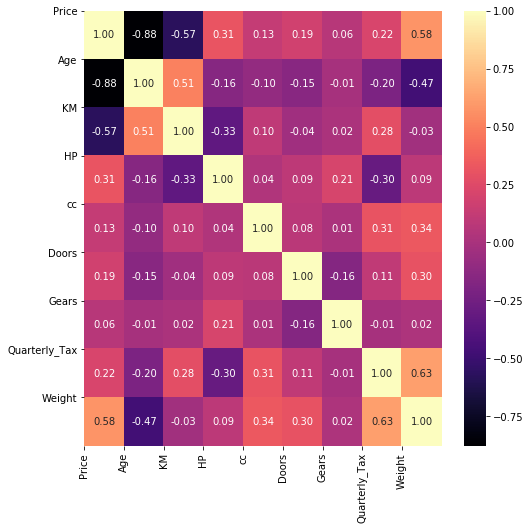

In [7]:
corr = Toyota1.corr()
#Plot figsize
fig, ax = plt.subplots(figsize=(8, 8))
#Generate Heat Map, allow annotations and place floats in map
sns.heatmap(corr, cmap='magma', annot=True, fmt=".2f")
#Apply xticks
plt.xticks(range(len(corr.columns)), corr.columns);
#Apply yticks
plt.yticks(range(len(corr.columns)), corr.columns)
#show plot
plt.show()

In [8]:
import statsmodels.api as sm

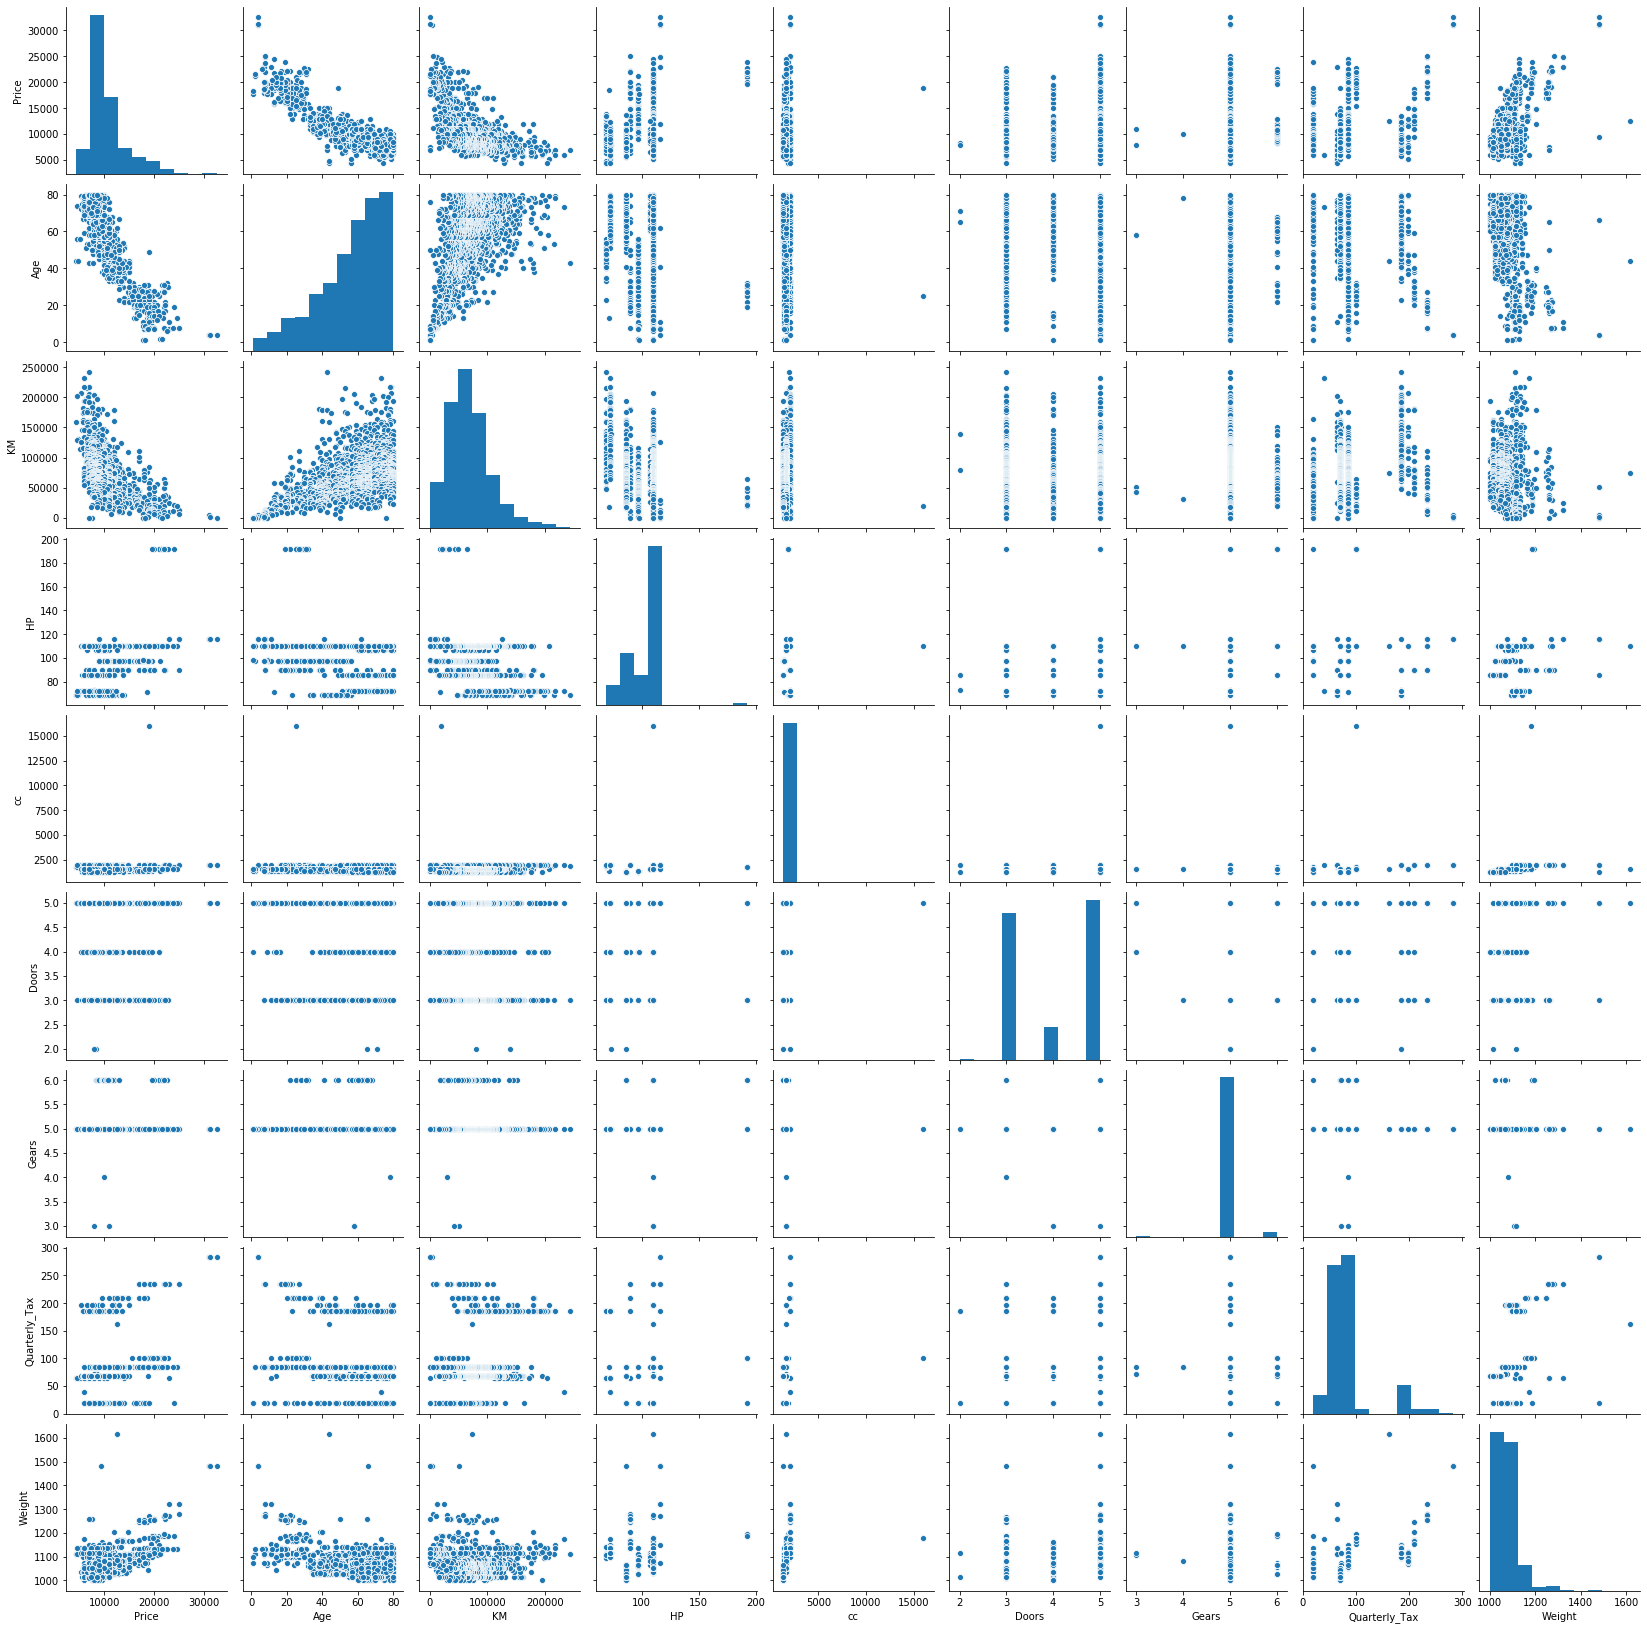

In [9]:
sns.pairplot(Toyota1)

In [10]:
dataset = pd.get_dummies(Toyota1)
dataset

,Price,Age,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


In [11]:
dataset.head()

,Price,Age,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


In [47]:
X = dataset.drop('Price', axis = 1).values
y = dataset.iloc[:, 0].values.reshape(-1,1)

In [48]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [49]:
print("Shape of X_train: ",X_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of y_train: ",y_train.shape)
print("Shape of y_test",y_test.shape)

Shape of X_train:  (1077, 8)
Shape of X_test:  (359, 8)
Shape of y_train:  (1077, 1)
Shape of y_test (359, 1)


In [50]:
from sklearn.linear_model import LinearRegression
regressor_linear = LinearRegression()
regressor_linear.fit(X_train, y_train)

LinearRegression()

In [51]:
y_pred = regressor_linear.predict(X_test)
y_pred

array([[11372.36615311],
       [ 8955.14888862],
       [ 9528.21510669],
       [ 8989.39260139],
       [10028.06634815],
       [ 7801.23894664],
       [ 8811.52659355],
       [ 8332.43952766],
       [14173.18461838],
       [13220.99992018],
       [ 9362.10537728],
       [ 9389.38696975],
       [13039.41200313],
       [13161.75131656],
       [ 9770.38483855],
       [ 8302.13007256],
       [12364.26480942],
       [17399.69007405],
       [ 7271.96926252],
       [ 9231.01631342],
       [12855.60774966],
       [17818.92569264],
       [ 7911.6025945 ],
       [10554.85098484],
       [ 7422.37938614],
       [15963.86354374],
       [ 9597.3356413 ],
       [ 7230.16295802],
       [15494.3043111 ],
       [14640.92785424],
       [ 8133.88131393],
       [ 9989.00375658],
       [ 8555.25372288],
       [10134.0374932 ],
       [10316.3023133 ],
       [ 8036.96110205],
       [ 8953.2164702 ],
       [ 9997.89726447],
       [16198.18659809],
       [ 9495.05193938],


In [52]:
y_test

array([[10800],
       [ 9950],
       [ 7500],
       [ 9250],
       [ 9750],
       [ 9950],
       [ 9895],
       [ 6750],
       [13450],
       [12950],
       [ 9900],
       [ 9750],
       [13500],
       [11500],
       [ 8950],
       [ 8950],
       [11500],
       [16950],
       [ 8250],
       [ 6999],
       [11495],
       [19500],
       [ 7950],
       [10750],
       [ 8950],
       [16895],
       [10950],
       [ 7950],
       [15950],
       [12950],
       [ 7950],
       [ 9450],
       [ 7400],
       [ 9450],
       [10500],
       [ 8700],
       [ 8450],
       [ 8950],
       [14950],
       [ 9950],
       [ 9950],
       [ 8950],
       [ 7495],
       [ 5600],
       [ 7500],
       [18950],
       [ 9250],
       [ 9950],
       [ 9950],
       [12750],
       [14950],
       [ 6750],
       [15750],
       [17950],
       [ 7950],
       [ 6650],
       [11500],
       [11950],
       [18750],
       [21950],
       [11450],
       [ 7350],
       [

In [53]:
# Predicting R2 Score the Train set results
y_pred_linear_train = regressor_linear.predict(X_train)
r2_score_linear_train = r2_score(y_train, y_pred_linear_train)


In [54]:
# Predicting R2 Score the Test set results
y_pred_linear_test = regressor_linear.predict(X_test)
r2_score_linear_test = r2_score(y_test, y_pred_linear_test)

In [55]:
# Predicting Cross Validation Score the Test set results
from sklearn.model_selection import cross_val_score
cv_linear = cross_val_score(estimator = regressor_linear, X = X_train, y = y_train, cv = 10)

In [56]:
rmse_linear = (np.sqrt(mean_squared_error(y_test , y_pred_linear_test )))

In [57]:
print("CV: ", cv_linear.mean())
print('R2_score (train): ', r2_score_linear_train)
print('R2_score (test): ', r2_score_linear_test)
print("RMSE: ", rmse_linear)

CV:  0.7719638138218411
R2_score (train):  0.8640307618150082
R2_score (test):  0.8614722799605135
RMSE:  1402.0810748973895
